In [164]:
from importlib import reload
import car; reload(car)
import environment; reload(environment)
Environment = environment.Environment
Car = car.Car

In [165]:
def select_action_fn(car):
    action = None
    if self.P.get((car.position, car.speed), None) and random.random() <= car.greedy_probability:
        action = car.P[(car.position, car.speed)]

    if action is None:
        action = random.choice(car.actions)

    if random.random() > 0.1:
        return action
    else:
        return (0, 0)

env = Environment("racetrack2_30x32.txt")
car = Car(env, select_action_fn=select_action_fn)

In [195]:
car.train(3000, update_policy_each=10)

Started iteration 2958      

KeyboardInterrupt: 

In [196]:
import numpy as np
#car.P = {}
#car.P = car.calculate_policy(car.Q)
num_steps = []
for i in range(2):
    # print(i)
    steps, _ = car.play()
    num_steps.append(len(steps))

np.median(num_steps)

51537.0

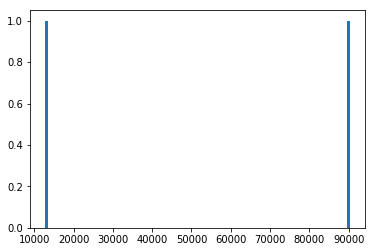

In [197]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(num_steps, bins=100)
None

In [194]:
steps, _ = car.play()
waypoints = [state[0] for (state, action) in steps]
env.path = waypoints
print(len(waypoints))
env.print(car)

2384
  01234567890123456789012345678901
  --------------------------------
0|++++++++++++++++               f
1|+++++++++++++     ·  ·         f
2|++++++++++++                   #
3|+++++++++++                    f
4|+++++++++++                    f
5|+++++++++++       ·· ·         f
6|+++++++++++                ·   f
7|++++++++++++                   f
8|+++++++++++++     ·           ++
9|++++++++++++++      ·      +++++
0|++++++++++++++         ·  ++++++
1|++++++++++++++   ·      ++++++++
2|++++++++++++++         +++++++++
3|++++++++++++++    ·    +++++++++
4|+++++++++++++       ·  +++++++++
5|++++++++++++  ·  ·     +++++++++
6|+++++++++++   ·        +++++++++
7|++++++++++ ·     ·   · +++++++++
8|+++++++++         ·  · +++++++++
9|++++++++   ·   · ·  ·· +++++++++
0|+++++++        ·   · · +++++++++
1|++++++··  ·            +++++++++
2|+++++ ·          ·     +++++++++
3|++++   ·· ·  ······ · ·+++++++++
4|+++   ····     ··· · · +++++++++
5|++· ·· · ·       ·     +++++++++
6|+ ··  ·······

In [200]:
car.Q

defaultdict(<function car.Car.train.<locals>.<lambda>>,
            {((1, 31), (-4, 4)): defaultdict(float,
                         {(-1, 0): 0.0, (-1, 1): 0.0, (0, 1): 0.0}),
             ((4, 28), (-4, 4)): defaultdict(float,
                         {(-1, 0): -5.166666666666667,
                          (-1, 1): -5.20353982300885,
                          (0, 1): -5.398148148148148}),
             ((8, 24), (-4, 4)): defaultdict(float,
                         {(-1, 0): -37.026315789473685,
                          (-1, 1): -38.30909090909091,
                          (0, 1): -37.660714285714285}),
             ((12, 20), (-4, 4)): defaultdict(float,
                         {(-1, 0): -133.2020202020202,
                          (-1, 1): -137.28125,
                          (0, 1): -143.1195652173913}),
             ((16, 16), (-4, 4)): defaultdict(float,
                         {(-1, 0): -199.873786407767,
                          (-1, 1): -203.66336633663366}),
          

In [201]:
car.actions

[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]